In [1]:
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
import scipy.integrate as integrate
init_printing(use_unicode=True)

# Le potentiel de Lennard-Jones: Atomes et structures

## (i) Demonstration

### Fonctions

#### Le potentiel de Lennard-Jones

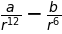

In [2]:
a, b, r = symbols("a b r")

lennardJones = a/r**12 - b/r**6
lennardJones

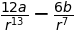

In [3]:
force = -lennardJones.diff(r)
force

#### Le potentiel de Lennard-Jones normalisé

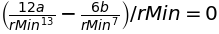

In [4]:
rMin = symbols('rMin')
equationDistanceMinimum = Eq(force.subs({r: rMin}) / rMin, 0)
equationDistanceMinimum

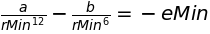

In [5]:
eMin = symbols('eMin')
equationEnergieMinimum = Eq(lennardJones.subs({r:rMin}), -eMin)
equationEnergieMinimum

In [6]:
criticalPointSolutions = solve([equationDistanceMinimum, equationEnergieMinimum], a, b)
criticalPointSolutions

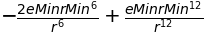

In [7]:
lennardJonesCritical = lennardJones.subs(criticalPointSolutions)
lennardJonesCritical

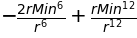

In [8]:
lennardJonesScaled = expand(lennardJonesCritical / eMin)
lennardJonesScaled

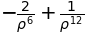

In [9]:
rho = symbols('rho')
energy = expand(lennardJonesScaled.subs({r: rho * rMin}))
energy

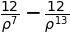

In [10]:
forceScaled = expand(energy.diff(rho))
forceScaled

Le potentiel de Lennard-Jones, ainsi que la force, peuvent etre separe en deux parties : attractive et repulsive.

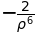

In [13]:
energyAttractive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
energyAttractive

In [14]:
energyRepulsive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
energyRepulsive

In [15]:
forceScaledAttractive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
forceScaledAttractive

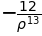

In [16]:
forceScaledRepulsive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
forceScaledRepulsive

### Graphiques

## (ii) Interaction

### Functions

### Visualisation 2: Approximations et oscillations

#### Approximations

In [17]:
parabolaApproximation = series(energy, rho, n=3, x0=1).removeO()
parabolaApproximation

In [18]:
cubicApproximation = series(energy, rho, n=4, x0=1).removeO()
cubicApproximation

#### Oscillations for the approximation 

In [19]:
t, mu = symbols("t mu")
fEqualsMA = Eq(mu*rho(t).diff(t,2)-12/(rho(t)**13)+12/(rho(t)**7))
fEqualsMA

TypeError: 'Symbol' object is not callable

In [ ]:
charateristicPeriod = 2*np.pi/np.sqrt(72)
fEqualsMA = fEqualsMA.subs({mu:1})
fEqualsMA

We will construct a numerical solution for a starting point near equilibrium and compute it for two of our estimated periods.  If we are doing everything right so far, our numerical solution should show al
most exactly two oscillations:

##### numSol

In [20]:
def fEqualsMA(rho_, t):
    rho, rho_prime = rho_
    rho_prime_prime = 12/(rho**13)-12/(rho**7)
    return [rho_prime, rho_prime_prime]

t = np.linspace(0, 10*charateristicPeriod, 2000)
init = [1.1, 0]
numSol = integrate.odeint(fEqualsMA, init, t)
rho, _ = numSol.T
energy = -2/(rho**6)+1/(rho**12)
plt.plot(rho, energy);

NameError: name 'charateristicPeriod' is not defined

##### numericalSolutionFromVariableStartingPoint

In [25]:
def numericalSolutionFromVariableStartingPoint(initialValue):
    t = np.linspace(0, 40, 20)
    rho_init = [initialValue, 0]
    return integrate.odeint(fEqualsMA, rho_init, t)
    
initialValue = 0.98
numSol = numericalSolutionFromVariableStartingPoint(initialValue)
numSol

array([[ 0.98      ,  0.        ],
       [ 0.99471162, -0.17642112],
       [ 1.01756767, -0.11630266],
       [ 1.02192126,  0.05871297],
       [ 1.00361923,  0.17970739],
       [ 0.98211644,  0.08403553],
       [ 0.98679041, -0.13934935],
       [ 1.01068742, -0.15993064],
       [ 1.02324962, -0.00528066],
       [ 1.01194765,  0.15411931],
       [ 0.98794253,  0.14769685],
       [ 0.98149299, -0.07127579],
       [ 1.00217042, -0.18132988],
       [ 1.02141007, -0.06871489],
       [ 1.01846641,  0.10766926],
       [ 0.99613868,  0.17919708],
       [ 0.98005722,  0.0142737 ],
       [ 0.99331054, -0.17273507],
       [ 1.01660147, -0.12456777],
       [ 1.02235168,  0.04854509]])

### Exercice 4 : Calcul du module de Young et de la contrainte, E et \[Sigma]

*Starting from the Lennard-Jones potential, the relationship can be calculated as the variation of the force around the equilibrium position, i.e. the seconde derivative of lennard-jones potential. It represent the curvature of the well.*

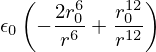

In [19]:
epsilon0, r0, r = symbols("epsilon0, r0, r")

lennardJonesWithUnits = epsilon0*((r0/r)**12 - 2*(r0/r)**6)
lennardJonesWithUnits

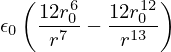

In [20]:
forceWithUnits = lennardJonesWithUnits.diff(r)
forceWithUnits

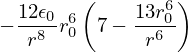

In [21]:
curvatureWithUnits = lennardJonesWithUnits.diff(r,2)
curvatureWithUnits

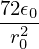

In [22]:
modulusAroundMinimalDistance = curvatureWithUnits.subs({r:r0})
modulusAroundMinimalDistance

*Starting from the parabolic approximation of the potential, the force is then a linear relationship between the displacement, i.e. r-Subscript[r, 0 ]and the force. F = k * (r-Subscript[r, 0])*

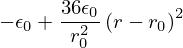

In [23]:
approxLennardJonesWithUnits = series(lennardJonesWithUnits, r, n=3, x0=r0).removeO()
approxLennardJonesWithUnits

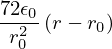

In [24]:
approxForceWithUnits = simplify(approxLennardJonesWithUnits.diff(r))
approxForceWithUnits

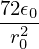

In [25]:
approxCurvatureWithUnits = simplify(approxLennardJonesWithUnits.diff(r,2))
approxCurvatureWithUnits

In [34]:
from sympy.parsing.sympy_parser import parse_expr



In [60]:
r = symbols('r')
r1 = symbols('r1')

In [61]:
r_test = lambdify([r,r1],parse_expr("1/(r1*r)"),"numpy")

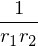

In [51]:
xs = np.linspace(0.8, 2, 1000)
r_test(xs)

In [62]:
r_test(1,2)

In [59]:
from sympy.abc import A,B
G = 4.939e-3*A*B # now this is a symbolic expression, not a string
H = lambdify( [A,B], G, "numpy" )
print(H(1,1))

0.004939
